## Classification Modeling For Bank Marketing Project

- Ibrahim Kiceci 
- Furkan Bozokluoglu 
- Mae Macenas Vega 

### 2. Data Loading

In [1]:
import pandas as pd

In [2]:
unclean_data = pd.read_csv("bank-sampled-9K.csv",sep = "," )

In [3]:
df = unclean_data.copy()

In [4]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,11,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
3,12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
4,17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9000 non-null   int64 
 1   age         9000 non-null   int64 
 2   job         9000 non-null   object
 3   marital     9000 non-null   object
 4   education   9000 non-null   object
 5   default     9000 non-null   object
 6   balance     9000 non-null   int64 
 7   housing     9000 non-null   object
 8   loan        9000 non-null   object
 9   contact     9000 non-null   object
 10  day         9000 non-null   int64 
 11  month       9000 non-null   object
 12  duration    9000 non-null   int64 
 13  campaign    9000 non-null   int64 
 14  pdays       9000 non-null   int64 
 15  previous    9000 non-null   int64 
 16  poutcome    9000 non-null   object
 17  y           9000 non-null   object
dtypes: int64(8), object(10)
memory usage: 1.2+ MB


## 3. Data Analysis, Preparation and Wrangling

### Dropping the duration column

In [6]:
df.drop('duration', axis = 1, inplace = True)

### Converting time and creating last_contact column

In [7]:
from datetime import datetime as dt

In [8]:
last_date  = "18 Nov, 2010" ## this is the analysis date (assumed)
dt_1 = dt.strptime(last_date, "%d %b, %Y")   ## converting to the last_date as a defined format

In [9]:
# the months should start with a capital letter
df["month"] = df["month"].apply(lambda x: x.capitalize())
df["date"] = df["day"].astype(str) + " " + df["month"] + ", 2010" ## creating date column by using day, month and 2010 and converting the day type to string

# calculate the duration btw two dates

df["last_contact"] = df["date"].apply(lambda x:(dt_1 - dt.strptime(x, "%d %b, %Y")).days) ## anlaysed day - last contacted day = number of days since last contact date
df.drop(columns = {'day', 'date', 'month'}, axis = 1, inplace = True )  ## dropping day, date, month


In [10]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,last_contact
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no,197
1,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no,197
2,11,29,admin.,single,secondary,no,390,yes,no,unknown,1,-1,0,unknown,no,197
3,12,53,technician,married,secondary,no,6,yes,no,unknown,1,-1,0,unknown,no,197
4,17,57,blue-collar,married,primary,no,52,yes,no,unknown,1,-1,0,unknown,no,197


### The summary statistics of the data

In [11]:
df.describe()

,Unnamed: 0,age,balance,campaign,pdays,previous,last_contact
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,22552.799889,41.035667,1372.970222,2.767667,39.906444,0.609556,150.289000
std,13076.016479,10.561698,3363.690197,3.011022,99.440498,3.499115,74.721977
min,0.000000,18.000000,-4057.000000,1.000000,-1.000000,0.000000,-42.000000
25%,11247.000000,33.000000,68.000000,1.000000,-1.000000,0.000000,104.000000
50%,22556.000000,39.000000,450.000000,2.000000,-1.000000,0.000000,166.000000
75%,33941.250000,48.000000,1453.250000,3.000000,-1.000000,0.000000,193.000000
max,45207.000000,90.000000,102127.000000,51.000000,831.000000,275.000000,316.000000


### Creating Dummy Variables for Each Categorical Features

In [12]:
## checking of the catregorical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    9000 non-null   int64 
 1   age           9000 non-null   int64 
 2   job           9000 non-null   object
 3   marital       9000 non-null   object
 4   education     9000 non-null   object
 5   default       9000 non-null   object
 6   balance       9000 non-null   int64 
 7   housing       9000 non-null   object
 8   loan          9000 non-null   object
 9   contact       9000 non-null   object
 10  campaign      9000 non-null   int64 
 11  pdays         9000 non-null   int64 
 12  previous      9000 non-null   int64 
 13  poutcome      9000 non-null   object
 14  y             9000 non-null   object
 15  last_contact  9000 non-null   int64 
dtypes: int64(7), object(9)
memory usage: 1.1+ MB


In [13]:
## getting categorical features

categorical_columns = df.select_dtypes('object').columns

In [14]:
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y'],
      dtype='object')

In [15]:
## implementing dummies method to the all categorical columns

for my_column in categorical_columns:
    dummy_columns = pd.get_dummies(df[my_column], prefix = my_column, drop_first = True)
    df = df.join(dummy_columns)
    df.drop(my_column, axis = 1, inplace = True)

In [16]:
df.head()

,Unnamed: 0,age,balance,campaign,pdays,previous,last_contact,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0,58,2143,1,-1,0,197,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,2,33,2,1,-1,0,197,0,1,0,...,0,0,1,1,0,1,0,0,1,0
2,11,29,390,1,-1,0,197,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,12,53,6,1,-1,0,197,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,17,57,52,1,-1,0,197,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [17]:
## checking the features types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           9000 non-null   int64
 1   age                  9000 non-null   int64
 2   balance              9000 non-null   int64
 3   campaign             9000 non-null   int64
 4   pdays                9000 non-null   int64
 5   previous             9000 non-null   int64
 6   last_contact         9000 non-null   int64
 7   job_blue-collar      9000 non-null   uint8
 8   job_entrepreneur     9000 non-null   uint8
 9   job_housemaid        9000 non-null   uint8
 10  job_management       9000 non-null   uint8
 11  job_retired          9000 non-null   uint8
 12  job_self-employed    9000 non-null   uint8
 13  job_services         9000 non-null   uint8
 14  job_student          9000 non-null   uint8
 15  job_technician       9000 non-null   uint8
 16  job_unemployed       900

In [18]:
## replacing hyphens with underscore in column names

In [19]:
df.columns = df.columns.str.replace('-', '_')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           9000 non-null   int64
 1   age                  9000 non-null   int64
 2   balance              9000 non-null   int64
 3   campaign             9000 non-null   int64
 4   pdays                9000 non-null   int64
 5   previous             9000 non-null   int64
 6   last_contact         9000 non-null   int64
 7   job_blue_collar      9000 non-null   uint8
 8   job_entrepreneur     9000 non-null   uint8
 9   job_housemaid        9000 non-null   uint8
 10  job_management       9000 non-null   uint8
 11  job_retired          9000 non-null   uint8
 12  job_self_employed    9000 non-null   uint8
 13  job_services         9000 non-null   uint8
 14  job_student          9000 non-null   uint8
 15  job_technician       9000 non-null   uint8
 16  job_unemployed       900

## 4.Feature Selection and Scaling

In [21]:
## checking of the y_yes column values
df["y_yes"].value_counts()

0    7969
1    1031
Name: y_yes, dtype: int64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9000.0,22552.799889,13076.016479,0.0,11247.0,22556.0,33941.25,45207.0
age,9000.0,41.035667,10.561698,18.0,33.0,39.0,48.00,90.0
balance,9000.0,1372.970222,3363.690197,-4057.0,68.0,450.0,1453.25,102127.0
campaign,9000.0,2.767667,3.011022,1.0,1.0,2.0,3.00,51.0
pdays,9000.0,39.906444,99.440498,-1.0,-1.0,-1.0,-1.00,831.0
previous,9000.0,0.609556,3.499115,0.0,0.0,0.0,0.00,275.0
last_contact,9000.0,150.289000,74.721977,-42.0,104.0,166.0,193.00,316.0
job_blue_collar,9000.0,0.211444,0.408356,0.0,0.0,0.0,0.00,1.0
job_entrepreneur,9000.0,0.034000,0.181239,0.0,0.0,0.0,0.00,1.0
job_housemaid,9000.0,0.029222,0.168438,0.0,0.0,0.0,0.00,1.0


In [23]:
##importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np
from sklearn.feature_selection import SelectFromModel


In [24]:
## Separate features (X) and target (y)
X = df.drop("y_yes", axis = 1) ##independent features
y = df["y_yes"] ## dependent feature

## Feature Selection Models

### Method 1: Logistic Regression Feature Selection 

How method1.fit(X,y) works ? 

Applies the selected feature selection method on the training data. That is, this method performs the learning process using the dataset.
This training process involves the feature selection method evaluating the importance of features using a specific model or criterion. For example, if SelectFromModel is used, this process involves determining the importance of features in the learning process of a particular model.

How method1.fit(X,y) works ?

this method must be tarined according to data set !! so using of this model, you can select features (Mesela sacma olur ama bu modeli gidip baska data setlerine uygulayip buradaki katsayilara gore bir secim yapar). Yani artik egitildi.


In [25]:
log_reg = LogisticRegression(max_iter=5000) ## repeating max 5000 times
## Logistic regression and similar models attempt to adjust the model's parameters to best fit the data, often using an optimization algorithm.

##is a parameter of this class. Here log_reg is a logistic regression model (or could be another model). 
##The SelectFromModel class selects features that are more than a certain threshold value during the learning process of this model.
method1 = SelectFromModel(estimator= log_reg)
method1.fit(X,y) ## Yani LogisticRegression max 5000 defa repeat edilecek en iyi model parametrelerini bulmak icin. ne kullanilacak SelectFrom model. Peki hangi veri setine gore egitilip secimler yapacak 
##showing the selected features result

pd.DataFrame({'coef': method1.estimator_.coef_[0], 'select_feature': method1.get_support()}, index=X.columns) ## getting the features greater than the threshold value

,coef,select_feature
Unnamed: 0,0.000048,False
age,-0.043152,True
balance,0.000014,False
campaign,-0.320401,True
pdays,-0.000954,False
previous,0.039765,True
last_contact,-0.003681,False
job_blue_collar,-0.023563,False
job_entrepreneur,-0.005607,False
job_housemaid,-0.003128,False


Asagidaki kodda sunu yaptik egitilmis olan modelimizi (model1) kullanarak, secimlerimizi yapiyoruz.
get_support(indices = True) -- > True veya False dondurur yani secilenler True, secilmeyenler False

In [26]:
selected_features_method1 = X.columns[method1.get_support(indices=True)]
## checking of the selected features for method1
selected_features_method1

Index(['age', 'campaign', 'previous', 'job_retired', 'marital_single',
       'education_secondary', 'housing_yes', 'loan_yes', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [27]:
#checking of the threshold value
method1.threshold_

0.030225873688792964

In [28]:
# False = insignificant feature; True= significant feature
method1.get_support()

array([False,  True, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False, False,  True,  True])

method1.transform(X)

X veri kümesini kullanarak sadece seçilen özellikleri içeren bir yeni veri kümesi oluşturur. Yani, sadece seçilen özelliklere ait sütunları içeren bir veri kümesi elde edersiniz.

Yani degerler olusmuyor sadece featureslari seciyor yani X'deki age degerin neyse, X_1'deki age degerinde ayni

In [29]:
## Gives the subset of features to use in analysis

X_1 =  method1.transform(X) ## creating a new dataset based on the selected features.
X_1.shape

(9000, 10)

### Method 2 : Linear SVM Feature Selection

In [30]:
## Feature selection using Linear SVM model

C parametresi, Linear SVM'nin düzenleme (regülarizasyon) parametresidir. Bu parametre, modelin eğitim verilerine ne kadar uyması veya genelleme yapması gerektiğini kontrol eder.
*Daha büyük C değerleri, daha az düzenleme anlamına gelir. Bu durumda, model eğitim verilerine daha fazla uymaya çalışır, ancak aşırı uyum riski artar.
*Daha küçük C değerleri, daha fazla düzenleme anlamına gelir. Bu durumda, model daha genel geçer olma eğilimindedir, ancak eğitim verilerine tam olarak uyma riski azalır.

In [31]:
l_svm = LinearSVC(C=0.001, dual = False)

In [32]:
## Using SelectFromModel for Feature Selection

method2 = SelectFromModel(estimator = l_svm)
method2.fit(X,y)


SelectFromModel(estimator=LinearSVC(C=0.001, dual=False))

In [33]:
## Getting selected feature indices as True and False
method2.get_support()


array([False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False,  True,  True])

In [34]:
selected_features_method2 = X.columns[method2.get_support(indices=True)]
selected_features_method2

Index(['campaign', 'job_blue_collar', 'job_retired', 'marital_married',
       'marital_single', 'education_secondary', 'housing_yes', 'loan_yes',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [35]:
## Show feature selection result

pd.DataFrame({'select_feature': method2.get_support()}, index=X.columns)

,select_feature
Unnamed: 0,False
age,False
balance,False
campaign,True
pdays,False
previous,False
last_contact,False
job_blue_collar,True
job_entrepreneur,False
job_housemaid,False


In [36]:
## checking of the threshold value
method2.threshold_

0.016128157163667337

In [37]:
## checking the selected features
X_2 = X.iloc[:,method2.get_support()]
print(X_2.shape)
X_2.head()

(9000, 10)


,campaign,job_blue_collar,job_retired,marital_married,marital_single,education_secondary,housing_yes,loan_yes,poutcome_success,poutcome_unknown
0,1,0,0,1,0,0,1,0,0,1
1,1,0,0,1,0,1,1,1,0,1
2,1,0,0,0,1,1,1,0,0,1
3,1,0,0,1,0,1,1,0,0,1
4,1,1,0,1,0,0,1,0,0,1


### Method 3: SelectKBest with mutual_info_classif

 Bu yöntem, belirli bir skorlama fonksiyonunu kullanarak özellikleri değerlendirir ve en iyi k özelliği seçer.
SelectFromModel ve SelectKBest farklı skorlama stratejileri kullanır ve veri setine bağlı olarak hangi yöntemin daha iyi performans gösterdiği değişebilir. 

mutual_info_classif = mutual_info_classif kullanılmıştır. Bu skorlama fonksiyonu, özelliklerin sınıflar arasındaki karşılıklı bilgiyi ölçer.

In [38]:
#Import libraries
from sklearn.feature_selection import SelectKBest, mutual_info_classif

#Feature selection using SelectKBest with mutual_info_classif
method3 = SelectKBest(score_func=mutual_info_classif, k=10) ## the best 10
method3.fit(X, y)

# Get selected feature indices
method3.get_support(indices=True)

#show feature selection result
pd.DataFrame({'select_feature': method3.get_support()}, index=X.columns)

,select_feature
Unnamed: 0,True
age,True
balance,False
campaign,True
pdays,True
previous,False
last_contact,True
job_blue_collar,False
job_entrepreneur,False
job_housemaid,False


In [39]:
X_3 = X.iloc[:,method3.get_support()]
print(X_3.shape)
X_3.head()

(9000, 10)


,Unnamed: 0,age,campaign,pdays,last_contact,housing_yes,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,1,-1,197,1,1,0,0,1
1,2,33,1,-1,197,1,1,0,0,1
2,11,29,1,-1,197,1,1,0,0,1
3,12,53,1,-1,197,1,1,0,0,1
4,17,57,1,-1,197,1,1,0,0,1


In [40]:
#Comparing the number of features selected between the 3 methods

#Get the number of features selected per method, it is counting of the trues'
method1_selected_features = np.count_nonzero(method1.get_support())
method2_selected_features = np.count_nonzero(method2.get_support())
method3_selected_features = np.count_nonzero(method3.get_support())

#Display and compare
print("Number of features selected in the logistic regression model: ", method1_selected_features)
print("Number of features selected in the linear SVM model: ", method2_selected_features)
print("Number of features selected in the SelectKBest model: ", method3_selected_features)

Number of features selected in the logistic regression model:  10
Number of features selected in the linear SVM model:  10
Number of features selected in the SelectKBest model:  10


### We select Method 1- LogisticRegression because it has the first method with the lowest number of features.

In [41]:
# Get the selected feature indices  () yani 0, 6, 15... diye hangi columnlar alindiysa onun sira numaralarini yazar
selected_feature_indices = method1.get_support(indices=True)

# Get the column names of selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a DataFrame with selected feature names
selected_features_df = pd.DataFrame({'Selected Features': selected_feature_names})

selected_features_df 

,Selected Features
0,age
1,campaign
2,previous
3,job_retired
4,marital_single
5,education_secondary
6,housing_yes
7,loan_yes
8,poutcome_success
9,poutcome_unknown


In [42]:
### saving the df to a CSV file

selected_features_df.to_csv('feature1.csv', index = False)

### Using of the robust scaler to scale the feature selected.

Pipeline, sıralı bir dizi işlemi birleştirmek ve bir araya getirmek için kullanılır. Bu işlemler, veri işleme sürecinde sıralı olarak uygulanır.

In [43]:
## robust scaler_value = OrginalValue-Median / IQR       (IQR: the interval between the third and first quartile in a data set )

select_scale_pipeline = Pipeline([
    ('feature_selection', method1),
     ('scaler', RobustScaler())
])


Sonuç olarak, X_final değişkenine, hem özellik seçimi hem de ölçekleme işlemlerinden geçirilmiş veri seti atanır.

In [44]:
X_final = select_scale_pipeline.fit_transform(X,y)

In [45]:
print(X_final.shape)

(9000, 10)


In [46]:
#Take a look at the X dataframe
X_final_df = pd.DataFrame(X_final, columns=X.columns[selected_feature_indices]) 
X_final_df

,age,campaign,previous,job_retired,marital_single,education_secondary,housing_yes,loan_yes,poutcome_success,poutcome_unknown
0,1.266667,-0.5,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
1,-0.400000,-0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.666667,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.933333,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.200000,-0.5,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8995,-0.333333,0.5,12.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
8996,0.933333,-0.5,4.0,0.0,0.0,-1.0,-1.0,0.0,1.0,-1.0
8997,2.266667,-0.5,8.0,1.0,0.0,0.0,-1.0,0.0,0.0,-1.0
8998,0.800000,0.5,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0


## 5. Classifier Modeling

In [47]:
##libraries
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


In [48]:
# Divide the dataset into training and test sets (75:25 ratio)

X_train, X_test, y_train, y_test = train_test_split(X_final_df, y, test_size = 0.25, random_state = 42)  ## X_final_df is scaled features

In [49]:
## creating pipeline for each classifier

classifiers = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
}

### Cross-Validation and Mean Scores

Burada artik modelin performansini degerlendirmek istiyoruz !!

In [50]:
mean_score = {}

k_fold = KFold(n_splits=4, shuffle=True, random_state=42) ## i choose 4

for clf_name, clf in classifiers.items():
    # Creating pipeline for each classifier
    pipeline = Pipeline([('classifier', clf)])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=k_fold) # Using of cross-validation and applying only training sets
    mean_score[clf_name] = cv_scores.mean() # Calculating mean cross-validation score
    print(f'{clf_name} Mean Accuracy- First Try:', np.mean(cv_scores))    


Naive Bayes Mean Accuracy- First Try: 0.8604425007795886
KNN Mean Accuracy- First Try: 0.88400012150344
Decision Tree Mean Accuracy- First Try: 0.8949636999693783
Random Forest Mean Accuracy- First Try: 0.8940748110024526


In [51]:
best_classifier = max(mean_score, key=mean_score.get)
print(f"The best classifier is: {best_classifier} with mean accuracy: {mean_score[best_classifier]}")

The best classifier is: Decision Tree with mean accuracy: 0.8949636999693783


In [52]:
## Decision tree has the best mean accuarcy score from the training dataset because it has the biggest mean score with 0.8948

## 6. Classifier Model - The Second Try

In [54]:
## checking of the features number

X_4 = method4.transform(X)
X_4.shape

(9000, 7)

### There are 7 features, these methods generates less features than logistic regression (which is selected in Part4-Feature Selection and Scaling).
### While we have 10 features using logistic regression, we have 7 features using random forest scaler in the second try.

In [55]:
## we can also print the selected features number

method4_selected_features = np.count_nonzero(method4.get_support())
print("Number of Features using of Random Forest Classifier: ", method4_selected_features)



Number of Features using of Random Forest Classifier:  7


In [56]:
## Getting the selected feature indices
second_selected_features_indices = method4.get_support(indices=True)
## Getting of the column names for selected features
second_selected_features_names = X.columns[second_selected_features_indices]
## creating of the df
second_selected_df = pd.DataFrame({'Selected Features': second_selected_features_names})
second_selected_df

,Selected Features
0,Unnamed: 0
1,age
2,balance
3,pdays
4,last_contact
5,housing_yes
6,poutcome_success


## Robust Scaling in The Second-Try

In [57]:
select_scale_pipeline2 = Pipeline([
    ('feature_selection2', method4),
    ('scaler2', RobustScaler())
])

X_final_second = select_scale_pipeline2.fit_transform(X,y)

In [58]:
## converting as a df

X_final_second = pd.DataFrame(X_final_second, columns = X.columns[second_selected_features_indices])
X_final_second ## this is with the robust scaled !!

,Unnamed: 0,age,balance,pdays,last_contact,housing_yes,poutcome_success
0,-0.993908,1.266667,1.222162,0.0,0.348315,0.0,0.0
1,-0.993820,-0.400000,-0.323407,0.0,0.348315,0.0,0.0
2,-0.993423,-0.666667,-0.043313,0.0,0.348315,0.0,0.0
3,-0.993379,0.933333,-0.320520,0.0,0.348315,0.0,0.0
4,-0.993159,1.200000,-0.287313,0.0,0.348315,0.0,0.0
...,...,...,...,...,...,...,...
8995,0.997742,-0.333333,0.739939,531.0,-1.842697,0.0,0.0
8996,0.997830,0.933333,0.096012,185.0,-1.853933,-1.0,1.0
8997,0.997962,2.266667,1.732539,41.0,-1.853933,-1.0,0.0
8998,0.998050,0.800000,0.270709,0.0,-1.853933,-1.0,0.0


In [59]:
## saving of the df features

second_selected_df.to_csv('feature2.csv', index = False)

### Implementing All The Classifiers To The Second Try

In [60]:
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(X_final_second, y, test_size = 0.25, random_state = 42)  ## X_final_second is scaled features

In [61]:
classifiers_second = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
}

In [62]:
from sklearn.pipeline import make_pipeline
import numpy as np

mean_score_second = {}
k_fold_second = KFold(n_splits=4, shuffle=True, random_state=42) ## i choose 4

for clf_name_second, clf_second in classifiers_second.items():
    # Creating pipeline for each classifier
    pipeline_second = Pipeline([('classifier2', clf_second)])
    cv_scores_second = cross_val_score(pipeline_second, X_train_second, y_train_second, cv=k_fold_second) # Using of cross-validation and applying only training sets
    mean_score_second[clf_name_second] = cv_scores_second.mean() # Calculating mean cross-validation score
    print(f'{clf_name_second} Mean Cross-Validation Score - Second Try: ', np.mean(cv_scores_second)) # Print results
    


Naive Bayes Mean Cross-Validation Score - Second Try:  0.8880004291248662
KNN Mean Cross-Validation Score - Second Try:  0.8757039122703023
Decision Tree Mean Cross-Validation Score - Second Try:  0.8921484898456836
Random Forest Mean Cross-Validation Score - Second Try:  0.894667140272561


In [63]:
best_classifier_second = max(mean_score_second, key=mean_score_second.get)
print(f"The best classifier is: {best_classifier_second} with mean accuracy: {mean_score_second[best_classifier_second]}")

The best classifier is: Random Forest with mean accuracy: 0.894667140272561


### Random Forest has the best mean accuarcy score for the second try with 0.8946671

## 7. Model Evaluation 

#### Comparing the accuracy of models from step 5 and 6 

In [64]:
print(f"The best classifier for Step 5 is: {best_classifier} with mean accuracy: {mean_score[best_classifier]} and 10 selected features ") 
print(f"The best classifier for Step 6 is: {best_classifier_second} with mean accuracy: {mean_score_second[best_classifier_second]} and 7 selected features")

The best classifier for Step 5 is: Decision Tree with mean accuracy: 0.8949636999693783 and 10 selected features 
The best classifier for Step 6 is: Random Forest with mean accuracy: 0.894667140272561 and 7 selected features


### Evaluation
Despite the Random Forest model having slightly lower accuracy compared to the Decision Tree, it's important to note that the difference in accuracy is minimal (0.0004). 
This suggests that, in this specific context, using fewer features in the Random Forest model did not significantly impact its predictive performance.The Random Forest model achieved a comparable level of accuracy while utilizing fewer features, indicating a more interpretable model.


#### Getting the Accuracy for Step 6 by using the classification

In [65]:
forest_second = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42)
forest_second.fit(X_train_second, y_train_second)
print("Test Accuracy For Step 6 is ", forest_second.score(X_test_second, y_test_second))

Test Accuracy For Step 6 is  0.9008888888888889


In [66]:
## Test Accuracy in Step 6 is slightly less than test accuracy in step 5 ,even though we re using the less features in Step 6 

### Prediction Using Random Forest Classifier

In [67]:
##X_new = [[-1,1,1,0,0,0,1,0,-1]]
X_subset = X_test_second.head() ## we can use the first few record from the test set (explained on the class video)

In [68]:
X_subset

,Unnamed: 0,age,balance,pdays,last_contact,housing_yes,poutcome_success
7940,0.766934,1.066667,19.616676,0.0,0.022472,-1.0,0.0
1162,-0.743360,-0.266667,0.467786,0.0,0.112360,0.0,0.0
582,-0.866695,0.466667,0.926187,0.0,0.247191,0.0,0.0
4081,-0.091962,-0.600000,0.180473,0.0,-0.764045,0.0,0.0
8412,0.865462,2.133333,0.621548,92.0,-1.775281,-1.0,1.0


In [69]:
rf= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_second,y_train_second)

RandomForestClassifier(max_depth=5, random_state=42)

In [70]:
y_pred = rf.predict(X_subset)

In [71]:
y_pred

array([0, 0, 0, 0, 1], dtype=uint8)

In [72]:
### Predicted Probability from Random Forest

pred_prob = rf.predict_proba(X_subset)  ## class probabilities for each sample, exmp: The probability of being 0 is 0.46, the probability of being 1 is 0.53
pred_prob

array([[0.64650079, 0.35349921],
       [0.94869192, 0.05130808],
       [0.95174036, 0.04825964],
       [0.93804619, 0.06195381],
       [0.26325053, 0.73674947]])

#### Confusion Matrix

In [73]:

##libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

y_pred_new = rf.predict(X_test_second)

y_pred_new


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

<Axes: xlabel='Predicted', ylabel='Actual'>

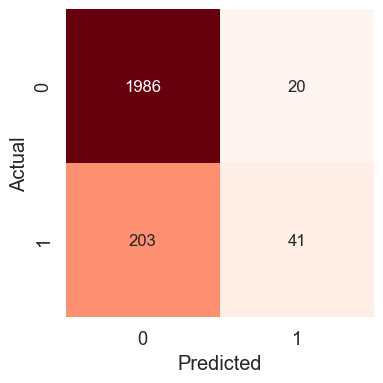

In [74]:
data = confusion_matrix(y_test_second, y_pred_new)
df_cm = pd.DataFrame(data, columns = np.unique(y_test_second), index = np.unique(y_test_second))
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize=(4,4))
sns.set(font_scale = 1.2)
sns.heatmap(df_cm, annot = True, annot_kws={'size':12}, cbar=False, vmax = 500, square = True, fmt = "d", cmap = "Reds")


#### Classification Report

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test_second, y_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2006
           1       0.67      0.17      0.27       244

    accuracy                           0.90      2250
   macro avg       0.79      0.58      0.61      2250
weighted avg       0.88      0.90      0.87      2250



#### ROC Curve

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

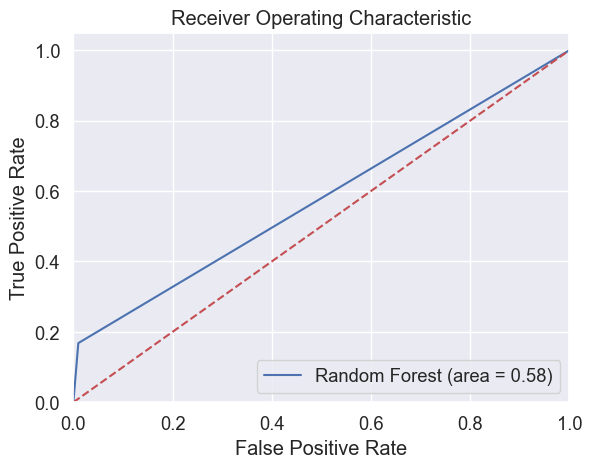

In [78]:
rf1_roc_auc = roc_auc_score(y_test_second, y_pred_new)
fpr, tpr, thresholds = roc_curve(y_test_second, y_pred_new)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### EVALUATION

TP :41, TN: 1986, FP: 20, FN: 203
According to the Confusion Matrix, the number of FN was determined as 203. This shows the number of cases that the model predicted as negative but were actually positive.
This means that the customer accepted the new product even though it was predicted not to accept it. As stated, the number of FN is quite high.
When we look at our precision and recall values and evaluate them together;
Precision = TP / (TP + FP):
     For class 0: This shows that the model is 91% accurate when predicting customers who does not accept.
     For class 1: This shows that the model is 67% accurate when predicting the customers who accept.
    
Recall = TP / (TP + FN)
    For class 0 : Indicates that this model accurately predicts 99% of the customers who will not accept
    For class 1 : Indicates that this model accurately predicts 17% of the customers who will accepts

High precision (0.91) and high recall (0.99) indicate that the model is successful in predicting customers who will not accept.
High precision (0.67) but low recall (0.17) indicates that the model is not very successful in predicting the customers who will subscribe

A low recall value for Class 1 indicates that the model the model misses on customers who would accept. (False negative value is high)

To reduce this situation, we can change the threshold value used in the models, or if the number of customers who did not accept in our data set is more than the number of customers who accepted, this may create an imbalance.

When we look at the ROC curve, we see that the area under the ROC curve is 0.58. This value should ideally approach 1. A value of 0.58 indicates that the performance of the model is not high. In the graph, true positive rate and false positive rate intersect towards point 1.

## 8.Prediction

In [79]:
new_data = pd.DataFrame({
    'age': [45, 65, 80, 21],
    'job': ['blue-collar', 'retired', 'unknown', 'students'],
    'marital': ['married', 'divorced', 'unknown', 'single'],
    'balance': [8000, 700, 100, 300],
    'housing': ['yes', 'yes', 'no', 'no'],
    'contact': ['cellular', 'telephone', 'telephone', 'cellular'],
    'campaign': [12, 2, 1, 3],
    'pdays': [300, 1, 1, 90],
    'poutcome': ['success', 'success', 'unknown', 'success'],
    'last_contact':[45,1,200,180],
    'Unnamed: 0':[0,2,11,12]
})

new_data_df = new_data.copy()

In [80]:
new_data_df.head()

,age,job,marital,balance,housing,contact,campaign,pdays,poutcome,last_contact,Unnamed: 0
0,45,blue-collar,married,8000,yes,cellular,12,300,success,45,0
1,65,retired,divorced,700,yes,telephone,2,1,success,1,2
2,80,unknown,unknown,100,no,telephone,1,1,unknown,200,11
3,21,students,single,300,no,cellular,3,90,success,180,12


In [81]:
## getting the relevant columns

In [82]:
new_data_df_subset = new_data[['Unnamed: 0','age', 'balance', 'pdays', 'housing', 'poutcome','last_contact']]

In [83]:
new_data_df_subset = pd.get_dummies(new_data_df_subset, columns=['housing', 'poutcome'])

In [84]:
new_data_df_subset

,Unnamed: 0,age,balance,pdays,last_contact,housing_no,housing_yes,poutcome_success,poutcome_unknown
0,0,45,8000,300,45,0,1,1,0
1,2,65,700,1,1,0,1,1,0
2,11,80,100,1,200,1,0,0,1
3,12,21,300,90,180,1,0,1,0


In [85]:
new_data_df_subset = new_data_df_subset[['Unnamed: 0','age', 'balance', 'pdays','last_contact', 'housing_yes', 'poutcome_success']]

In [86]:
new_data_df_subset

,Unnamed: 0,age,balance,pdays,last_contact,housing_yes,poutcome_success
0,0,45,8000,300,45,1,1
1,2,65,700,1,1,1,1
2,11,80,100,1,200,0,0
3,12,21,300,90,180,0,1


In [87]:
new_data_scaled = select_scale_pipeline2['scaler2'].transform(new_data_df_subset)

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [88]:
rf_new= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_new.fit(X_train_second, y_train_second)
y_pred_data_scaled = rf_new.predict(new_data_scaled)

C:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [89]:
y_pred_data_scaled

array([0, 0, 0, 0], dtype=uint8)

### Discussing our findings providing some suggestion to management on how to increase the number of people to agree to sign into the new product.
Using our model, we tried to predict whether customers would buy the new product. All our results are 0 so, 
The model shows that all new customers will not buy the new product. Bank management needs to re-evaluate its marketing strategy. The bank can divide its customers into different groups and organize special campaigns for each group. For this, more data can be collected, especially regarding customer profiles and behaviors. As another recommendation, the bank can change its digital marketing strategies to reach its target audience.

## B. COMPETITION 

## 1. Dataset

In [90]:
## reading data

In [91]:
df_c = pd.read_csv("bank-sampled-9K.csv", sep = ",")

In [92]:
df_c

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,11,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
3,12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
4,17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
8996,45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
8997,45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
8998,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


In [93]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9000 non-null   int64 
 1   age         9000 non-null   int64 
 2   job         9000 non-null   object
 3   marital     9000 non-null   object
 4   education   9000 non-null   object
 5   default     9000 non-null   object
 6   balance     9000 non-null   int64 
 7   housing     9000 non-null   object
 8   loan        9000 non-null   object
 9   contact     9000 non-null   object
 10  day         9000 non-null   int64 
 11  month       9000 non-null   object
 12  duration    9000 non-null   int64 
 13  campaign    9000 non-null   int64 
 14  pdays       9000 non-null   int64 
 15  previous    9000 non-null   int64 
 16  poutcome    9000 non-null   object
 17  y           9000 non-null   object
dtypes: int64(8), object(10)
memory usage: 1.2+ MB


#### implementing dummy methods to all columns

In [94]:
categorical_columns_comp = df_c.select_dtypes('object').columns

In [95]:
categorical_columns_comp

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [96]:
## implementing of the all categorical columns

for my_column_comp in categorical_columns_comp:
    dummy_columns_comp = pd.get_dummies(df_c[my_column_comp], prefix = my_column_comp, drop_first = True)
    df_c = df_c.join(dummy_columns_comp)
    df_c.drop(my_column_comp, axis = 1, inplace = True)

In [97]:
df_c.head()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0,58,2143,5,261,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2,33,2,5,76,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,11,29,390,5,137,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,12,53,6,5,517,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,17,57,52,5,38,1,-1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [98]:
## Training and Test split

In [99]:
X_comp = df_c.drop(['y_yes'], axis=1) ##independent values
y_comp = df_c['y_yes'] ## dependent values

In [100]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_comp, y_comp, test_size=0.25, random_state=1024)

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

In [102]:
# Initialize 10-fold cross-validation
kf_c = KFold(n_splits=10, shuffle=True, random_state=1024)
# Define different combinations of feature selection, scaling, and classification methods
feature_selection_methods_cp = [SelectFromModel(estimator=LogisticRegression(max_iter=5000)),
                             SelectFromModel(DecisionTreeClassifier(random_state=1024)),
                             SelectFromModel(RandomForestClassifier(random_state=1024))]

In [103]:
scaling_methods_cp = [StandardScaler(), 
                   RobustScaler(), 
                   MinMaxScaler()]

In [104]:
classification_methods_cp = [LogisticRegression(max_iter=5000), 
                          DecisionTreeClassifier(random_state=1024), 
                          RandomForestClassifier(random_state=1024)]

In [105]:
results_comp = {}


for feature_selection_cp in feature_selection_methods_cp:
    for scaling_cp in scaling_methods_cp:
        for classification_cp in classification_methods_cp:
            # Create a pipeline with the current combination
            model_cp = make_pipeline(
                feature_selection_cp,
                scaling_cp,
                classification_cp
            )
            
            # Evaluate the model using cross-validation
            accuracy_scores_cp = cross_val_score(model_cp, X_train_c, y_train_c, cv=kf_c)
            
            # Calculate the average accuracy
            average_accuracy_cp = accuracy_scores_cp.mean()
            
           # Store the results in the dictionary
            results_comp[(type(feature_selection_cp).__name__, type(scaling_cp).__name__, type(classification_cp).__name__)] = average_accuracy_cp


In [106]:
# Find the best-performing combination
best_combination_cp = max(results_comp, key=results_comp.get)
best_accuracy_cp = results_comp[best_combination_cp]


In [107]:
# Print the best-performing combination
print(f'Best Performing Combination: Feature Selection: {best_combination_cp[0]}, Scaling: {best_combination_cp[1]}, '
      f'Classification: {best_combination_cp[2]}, Average Accuracy: {best_accuracy_cp:.4f}')

Best Performing Combination: Feature Selection: SelectFromModel, Scaling: MinMaxScaler, Classification: RandomForestClassifier, Average Accuracy: 0.9132
